## Задание

1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

    а) зависимость цены на недвижимость в конкретном регионе от времени,
    
    б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
    
    в) количество отказов компьютера,
    
    г) число обращений в поликлинику по району,
    
    д) координаты автобуса при движении по маршруту,
    
    е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовым.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

import os
#print(os.listdir())

1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

    а) зависимость цены на недвижимость в конкретном регионе от времени,
    
    б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
    
    в) количество отказов компьютера,
    
    г) число обращений в поликлинику по району,
    
    д) координаты автобуса при движении по маршруту,
    
    е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

а, б, в, г

2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [2]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [3]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [4]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119068 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


интервал изменения от 2005-01-01 01:00:00 до 2018-08-03 00:00:00.

Шаг 1 час. 

Общий объем 119068 значений, тип float64.

In [6]:
data['DUQ_MW'].isnull().sum()

0

In [7]:
ut = data.index.unique()
print('число уникальных значений:   ',ut.shape[0],' : число наблюдений : ', data.shape[0])

число уникальных значений:    119064  : число наблюдений :  119068


In [8]:
count_data = data.index.value_counts()
count_data.head()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: Datetime, dtype: int64

In [9]:
date_period_start = data.index.values.min()
date_period_end = data.index.values.max()
all_date_time = pd.date_range(start=date_period_start, end=date_period_end, freq="1H")
all_date_time.shape[0]

119088

In [10]:
all_date_time.shape[0] - data.shape[0]

20

Нет 20ти значений + 4 дублирующихся, итого 24

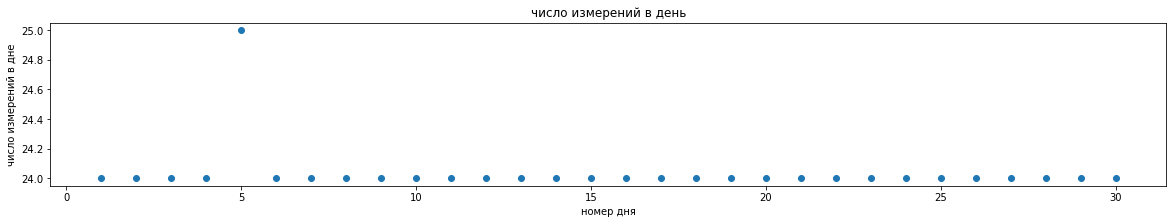

In [11]:
day_H=data['2017-11-01 00:00:00':'2017-11-30 23:00:00'].index.day

plt.figure(figsize=(20,3))
plt.plot(day_H.value_counts().index, day_H.value_counts().values ,'o')

plt.xlabel('номер дня')
plt.ylabel('число измерений в дне')
plt.title('число измерений в день')
plt.show()

In [12]:
data['2017-11-05 01:00:00':'2017-11-05 06:00:00'].index

DatetimeIndex(['2017-11-05 01:00:00', '2017-11-05 02:00:00',
               '2017-11-05 02:00:00', '2017-11-05 03:00:00',
               '2017-11-05 04:00:00', '2017-11-05 05:00:00',
               '2017-11-05 06:00:00'],
              dtype='datetime64[ns]', name='Datetime', freq=None)

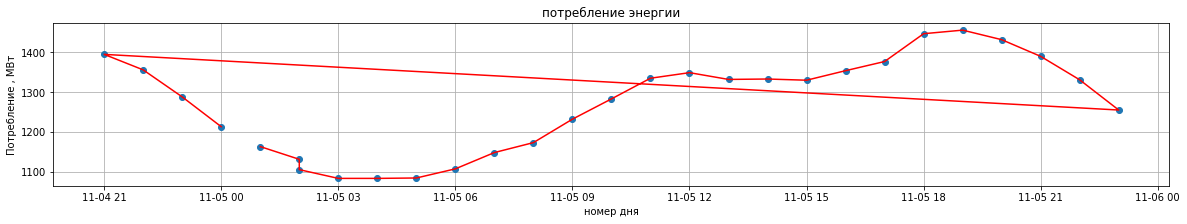

In [13]:
plt.figure(figsize=(20,3))
plt.plot(data['2017-11-04 21:00:00':'2017-11-05 23:00:00'].index,data['2017-11-04 21:00:00':'2017-11-05 23:00:00']['DUQ_MW'].values, 'o')
plt.plot(data['2017-11-04 21:00:00':'2017-11-05 23:00:00'].index,data['2017-11-04 21:00:00':'2017-11-05 23:00:00']['DUQ_MW'].values, 'r')
plt.grid()
plt.xlabel('номер дня')
plt.ylabel('Потребление , МВт')
plt.title('потребление энергии')

plt.show()

В следствие перехода на летнее, зимнее время имеем повторяющиеся значениеи недостающие измерения.

In [14]:
#Сортируем
#data = data.sort_index()

In [15]:
data.index.value_counts()[:4]

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
Name: Datetime, dtype: int64

In [16]:
#Убираем дубликаты
data = data.groupby(level=0).mean()
data.shape[0]

119064

Восстановим недостающие 24 значения

In [17]:
lost_date = set(all_date_time) - set(data.index)
lost_date = list(lost_date)

In [18]:
from datetime import timedelta
one_day = timedelta(days=1)

data.loc[lost_date[0]-one_day]

new_data = pd.Series(data=[(data.loc[i-one_day]['DUQ_MW']+data.loc[i+one_day]['DUQ_MW'])/2 for i in lost_date], index=lost_date, name='DUQ_MW')
data = data.append(pd.DataFrame(new_data))
data.shape[0]

119088

In [19]:
#Сортируем
data = data.sort_index()

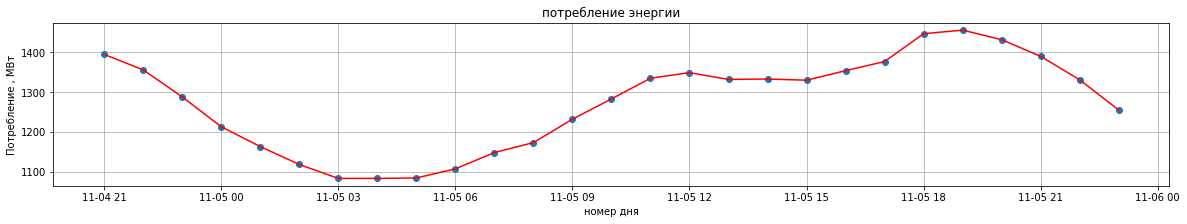

In [20]:
plt.figure(figsize=(20,3))
plt.plot(data['2017-11-04 21:00:00':'2017-11-05 23:00:00'].index,data['2017-11-04 21:00:00':'2017-11-05 23:00:00']['DUQ_MW'].values, 'o')
plt.plot(data['2017-11-04 21:00:00':'2017-11-05 23:00:00'].index,data['2017-11-04 21:00:00':'2017-11-05 23:00:00']['DUQ_MW'].values, 'r')
plt.grid()
plt.xlabel('номер дня')
plt.ylabel('Потребление , МВт')
plt.title('потребление энергии')

plt.show()

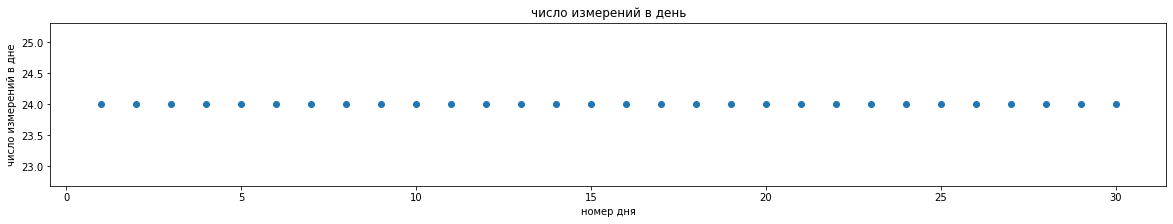

In [21]:
day_H=data['2017-11-01 00:00:00':'2017-11-30 23:00:00'].index.day

plt.figure(figsize=(20,3))
plt.plot(day_H.value_counts().index, day_H.value_counts().values ,'o')

plt.xlabel('номер дня')
plt.ylabel('число измерений в дне')
plt.title('число измерений в день')
plt.show()

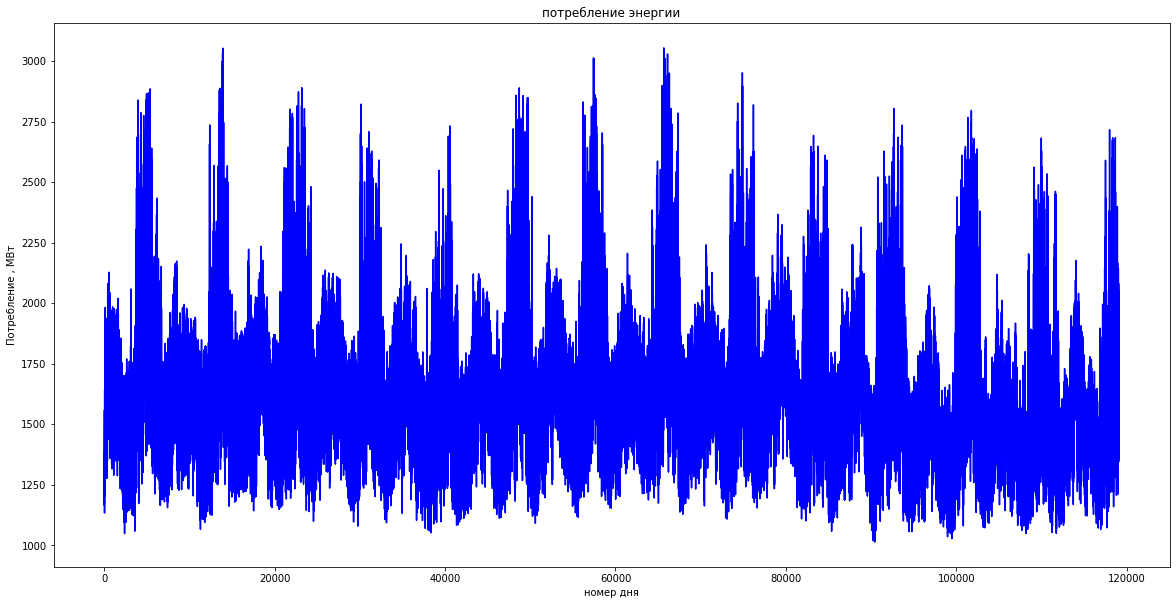

In [22]:
plt.figure(figsize=(20,10))
#plt.plot(data.values, '.')
plt.plot(data.values, 'b')

plt.xlabel('номер дня')
plt.ylabel('Потребление , МВт')
plt.title('потребление энергии')
plt.show()

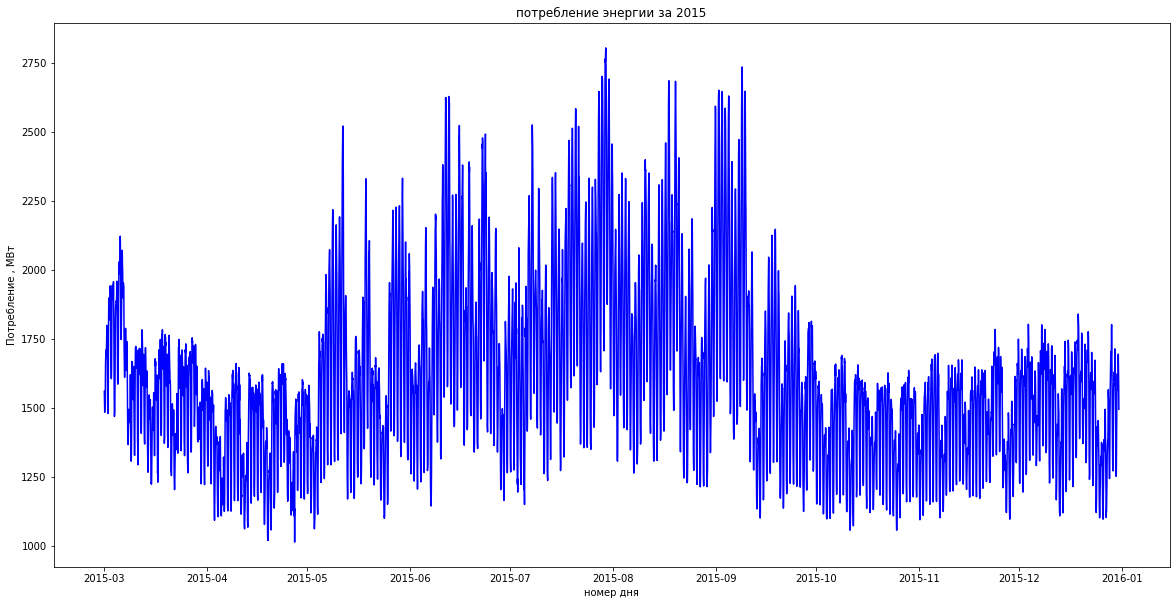

In [23]:
plt.figure(figsize=(20,10))
#plt.plot(data.values, '.')
plt.plot(data['2015-03-01 01:00:00':'2015-12-30 23:00:00'].index, data['2015-03-01 01:00:00':'2015-12-30 23:00:00']['DUQ_MW'].values, 'b')

plt.xlabel('номер дня')
plt.ylabel('Потребление , МВт')
plt.title('потребление энергии за 2015')
plt.show()

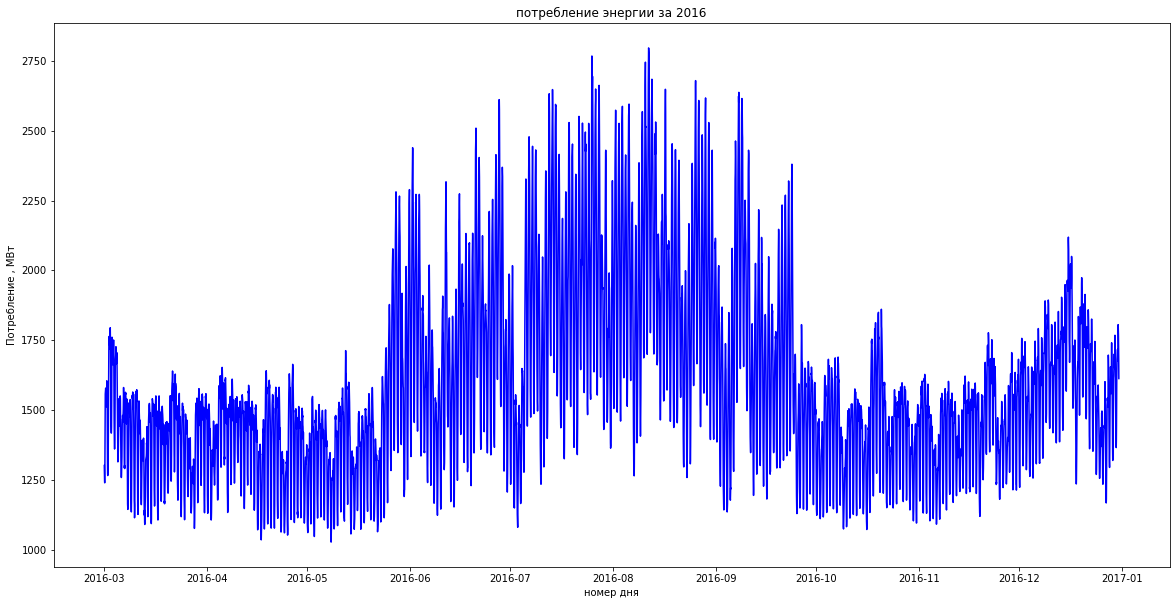

In [24]:
plt.figure(figsize=(20,10))
#plt.plot(data.values, '.')
plt.plot(data['2016-03-01 01:00:00':'2016-12-30 23:00:00'].index, data['2016-03-01 01:00:00':'2016-12-30 23:00:00']['DUQ_MW'].values, 'b')

plt.xlabel('номер дня')
plt.ylabel('Потребление , МВт')
plt.title('потребление энергии за 2016')
plt.show()

3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [25]:
brent = pd.read_excel('brent 2010-2019.xlsx', names=['date', 'cost'], index_col=[0], parse_dates=[0]).sort_index()

In [26]:
brent.head()

,cost
date,
2010-09-01,76.37
2010-09-02,76.89
2010-09-03,76.57
2010-09-04,76.62
2010-09-05,76.63


In [27]:
brent_week = brent.resample('W').mean().sort_index()
brent_week.head()

,cost
date,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


In [28]:
brent_month = brent.resample('M').mean().sort_index()
brent_month.head()

,cost
date,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

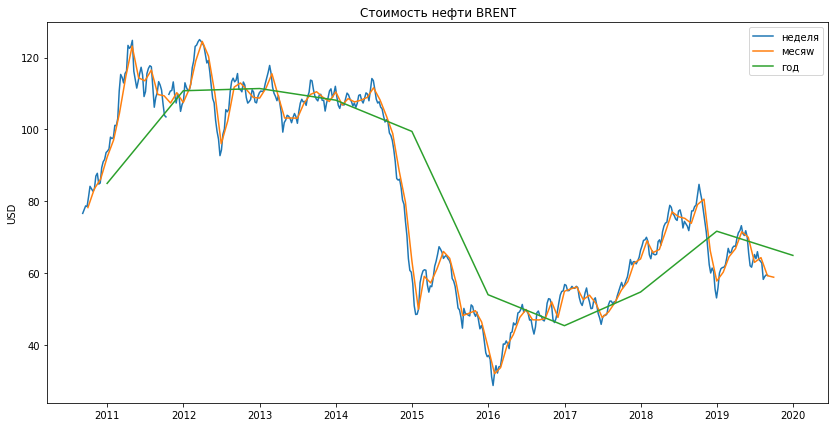

In [29]:
brent_year = brent.resample('Y').mean().sort_index()

plt.figure(figsize=(14, 7))

plt.plot(brent_week.index, brent_week.cost, '-', label='неделя')
plt.plot(brent_month.index, brent_month.cost, '-', label='месяw')
plt.plot(brent_year.index, brent_year.cost, '-', label='год')
plt.legend()

plt.title('Стоимость нефти BRENT')
plt.ylabel('USD')


plt.show()

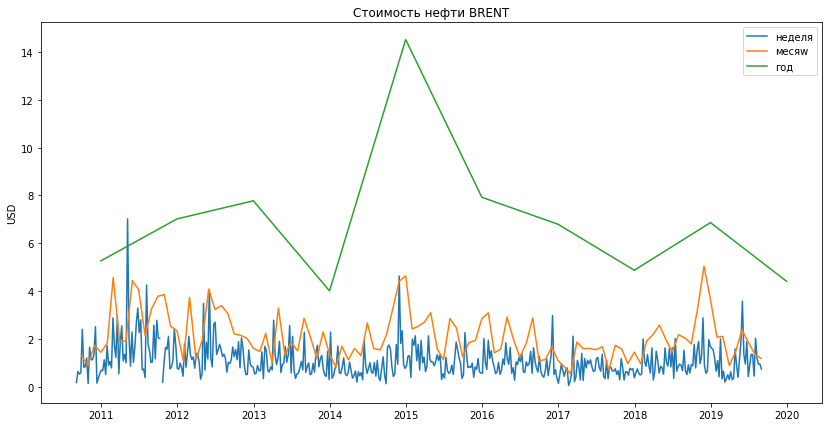

In [30]:
brent_week_std = brent.resample('W').std().sort_index()
brent_month_std = brent.resample('M').std().sort_index()
brent_year_std = brent.resample('Y').std().sort_index()

plt.figure(figsize=(14, 7))

plt.plot(brent_week_std.index, brent_week_std.cost, '-', label='неделя')
plt.plot(brent_month_std.index, brent_month_std.cost, '-', label='месяw')
plt.plot(brent_year_std.index, brent_year_std.cost, '-', label='год')
plt.legend()

plt.title('Стоимость нефти BRENT')
plt.ylabel('USD')


plt.show()

5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовым.

С увеличением периода поведение целевой переменной на графиках сглаживается.
С увеличением периода стандартное отклонение увеличивается.